<a href="https://colab.research.google.com/github/AbhishekAA002/Machine-Learning/blob/main/Multiple_linear_regression_using_gradient_descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

housing = pd.read_csv('/content/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
X = housing[['area','bedrooms']]
y = housing['price']

In [12]:
X['intercept'] = 1
#X = X.reindex_axis(['intercept','area','bedrooms'], axis=1)
X.head()

<ipython-input-12-ec71ca77c094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,area,bedrooms,intercept
0,7420,4,1
1,8960,4,1
2,9960,3,1
3,7500,4,1
4,7420,4,1


In [13]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [14]:
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [15]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [16]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [17]:
gradient_descent_multi(X, y, theta, alpha, iterations)

<ipython-input-15-5774767d0957>:2: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-16-48c605d6eddb>:7: RuntimeWarning: overflow encountered in matmul
  gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
<ipython-input-16-48c605d6eddb>:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradient


,Bets,cost
0,"[267229200.50091743, 146390.26275229358, 47667...",1.115046e+24
1,"[-83452354160204.69, -41459930687.64248, -1376...",1.087439e+35
2,"[2.6061214533835133e+19, 1.2947470005550546e+1...",1.060515e+46
3,"[-8.138618853913808e+24, -4.043346612281749e+2...",1.034258e+57
4,"[2.541597467120574e+30, 1.2626908438553946e+27...",1.008651e+68
...,...,...
995,"[nan, nan, nan]",NaN
996,"[nan, nan, nan]",NaN
997,"[nan, nan, nan]",NaN
998,"[nan, nan, nan]",NaN


<ipython-input-15-5774767d0957>:2: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
<ipython-input-16-48c605d6eddb>:7: RuntimeWarning: overflow encountered in matmul
  gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
<ipython-input-16-48c605d6eddb>:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradient


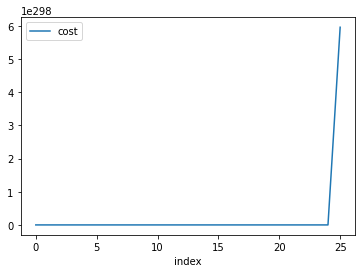

In [18]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])